# 3.1 $\quad$ Introducción a la optimización media-varianza

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")

Cuando se trabaja con un conjunto de carteras aleatorias representadas como una nube de puntos en un espacio de rendimiento y riesgo, tal y como hemos hecho hasta ahora, se pueden observar diversas combinaciones de activos que ofrecen diferentes niveles de rendimiento y riesgo. La pregunta entonces es, **¿cuáles son las carteras eficientes?**. La optimización media-varianza busca identificar la cartera óptima dentro de esta nube de puntos, es decir, aquella cartera que proporciona el máximo rendimiento esperado para un nivel de riesgo dado o, alternativamente, el mínimo riesgo para un nivel de rendimiento objetivo.

Antes de entrar en detalle, veamos de nuevo una aproximación generando 2000 carteras aleatorias para 4 activos.

In [ ]:
# -----------------------------
# 1) Descargar precios
# -----------------------------
tickers = ["SPY", "GLD", "AAPL", "MSFT"]  # en Yahoo no se usa .O
start = "2010-01-01"
end = "2025-12-31"

prices = yf.download(
    tickers,
    start=start,
    end=end,
    auto_adjust=True,
    progress=False
)["Close"]


In [ ]:
# Calculamos retornos de los activos.
retornos = np.log(prices).diff().dropna()

In [ ]:
# Número de activos.
num_act = retornos.shape[1]
# Número de carteras a simular.
num_carteras = 2000

In [ ]:
# Generamos carteras aleatorias.
rng = np.random.default_rng(seed=42)
pesos = rng.random((num_carteras, num_act))
pesos /= np.sum(pesos, axis=1).reshape(-1, 1)
# Comprobamos que la suma de los pesos de cada cartera es 1.
np.sum(pesos, axis=1)

array([1., 1., 1., ..., 1., 1., 1.])

In [ ]:
# Cálculo de retornos de las carteras.
ret_carteras = retornos @ pesos.T  # (2061, 2000)
# Cálculo de retornos y volatilidades anualizadas.
volatilidades = np.std(ret_carteras, axis=0) * np.sqrt(252)
rentabilidades = np.mean(ret_carteras, axis=0) * 252

print(f"volatilidades: {volatilidades.shape}")
print(f"rentabilidades: {rentabilidades.shape}")

volatilidades: (2000,)
rentabilidades: (2000,)


Dado un **riesgo máximo** asumible de 0.13, ¿cuál es la cartera eficiente? El código siguiente genera una figura donde poder discutir qué decisión tomamos.

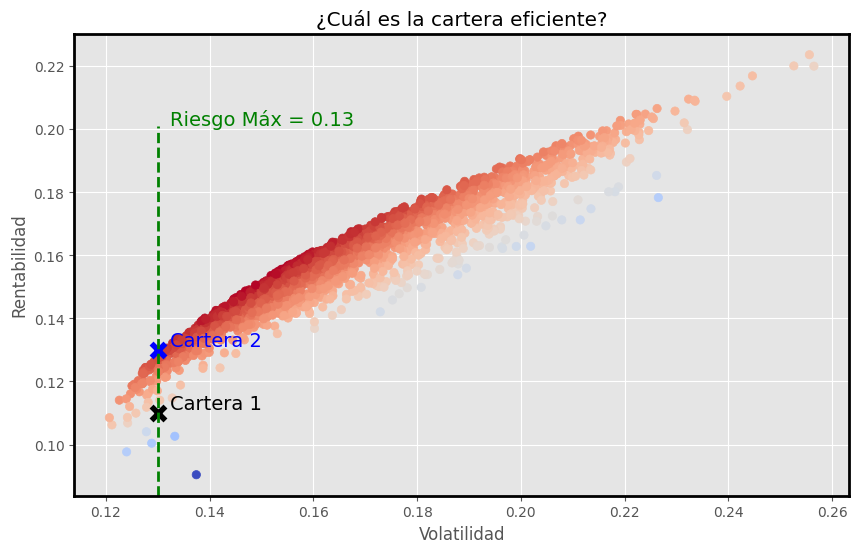

In [ ]:
# grafico

plt.figure(figsize=(10, 6))
plt.scatter(x=volatilidades, y=rentabilidades, c=rentabilidades / volatilidades, marker="o", cmap="coolwarm")
plt.xlabel("Volatilidad")
plt.ylabel("Rentabilidad")
plt.title("¿Cuál es la cartera eficiente?")


# Añadir un segmento vertical
plt.axvline(x=0.13, ymin=0, ymax=0.8, color="green", linestyle="--", linewidth=2)

# Añadir etiqueta al segmento vertical
plt.text(0.15, 0.2, "Riesgo Máx = 0.13", fontsize=14, verticalalignment="bottom", horizontalalignment="center", color="green")


# Añadir puntos específicos
plt.scatter(0.13, 0.11, color="black", marker="x", s=100, linewidths=4)  # Punto para la cartera 1
plt.scatter(0.13, 0.13, color="blue", marker="x", s=100, linewidths=4)  # Punto para la cartera 2

# Añadir etiquetas para los puntos
plt.text(0.15, 0.11, "Cartera 1", fontsize=14, verticalalignment="bottom", horizontalalignment="right", color="black")
plt.text(0.15, 0.13, "Cartera 2", fontsize=14, verticalalignment="bottom", horizontalalignment="right", color="blue")

# Configurar el borde de la figura
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_edgecolor("black")
    spine.set_linewidth(2)


plt.show()

También podemos hacerlo partiendo de un rendimiento mínimo. Dada una **rentabilidad mínima exigida** de un 0.08, ¿cuál es la cartera eficiente? Veamos la siguiente figura para discutirlo.

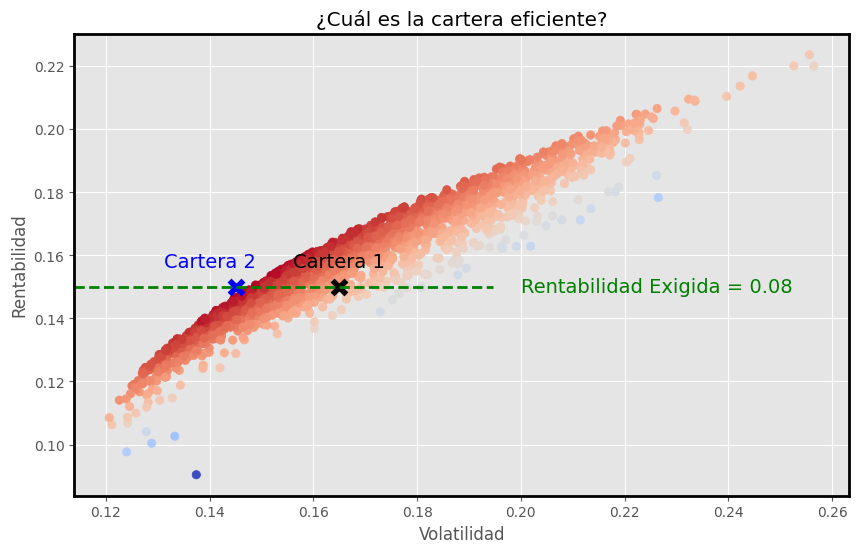

In [ ]:
# grafico

plt.figure(figsize=(10, 6))
plt.scatter(x=volatilidades, y=rentabilidades, c=rentabilidades / volatilidades, marker="o", cmap="coolwarm")
plt.xlabel("Volatilidad")
plt.ylabel("Rentabilidad")
plt.title("¿Cuál es la cartera eficiente?")
# plt.colorbar(label='Sharpe ratio')

# Añadir un segmento vertical
plt.axhline(xmin=0, xmax=0.54, y=0.15, color="green", linestyle="--", linewidth=2)

# Añadir etiqueta al segmento vertical
plt.text(0.20, 0.15, "Rentabilidad Exigida = 0.08", fontsize=14, verticalalignment="center", horizontalalignment="left", color="green")


# Añadir puntos específicos
plt.scatter(0.165, 0.15, color="black", marker="x", s=100, linewidths=4)  # Punto para la cartera 1
plt.scatter(0.145, 0.15, color="blue", marker="x", s=100, linewidths=4)  # Punto para la cartera 2

# Añadir etiquetas para los puntos
plt.text(0.165, 0.155, "Cartera 1", fontsize=14, verticalalignment="bottom", horizontalalignment="center", color="black")
plt.text(0.14, 0.155, "Cartera 2", fontsize=14, verticalalignment="bottom", horizontalalignment="center", color="blue")

# Configurar el borde de la figura
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_edgecolor("black")
    spine.set_linewidth(2)


plt.show()

La optimización media-varianza de carteras (MVO por sus siglas en inglés) es una herramienta fundamental en el mundo de las finanzas que busca maximizar el rendimiento esperado de una cartera de activos mientras se minimiza el riesgo asociado. Este enfoque se basa en la teoría moderna de carteras desarrollada por Harry Markowitz en la década de 1950, que establece que los inversores pueden construir carteras óptimas que ofrecen el mejor equilibrio posible entre rendimiento y riesgo.

En resumen, la optimización media-varianza es una herramienta poderosa que proporciona un marco sistemático para la construcción y gestión de carteras de inversión, ayudando a los inversores a alcanzar sus metas financieras de manera más efectiva y eficiente.

## 1. La función de utilidad del inversor

Para definir carteras eficientes, es esencial considerar la **función de utilidad del inversor**, una herramienta fundamental que refleja cómo valora el riesgo y el retorno en sus inversiones y actúa como un barómetro que cuantifica la satisfacción o felicidad derivada de una inversión, permitiendo así evaluar las preferencias del inversor en términos de riesgo y rendimiento.

Esta función refleja la aversión al riesgo del inversor: aquellos con una mayor aversión prefieren inversiones más seguras, mientras que los inversores menos aversos pueden estar dispuestos a asumir mayores riesgos en busca de retornos más altos. De este modo, una cartera que sea óptima para un inversor con baja aversión al riesgo podría no serlo para otro inversor con una aversión menor. Por lo tanto, la definición de eficiencia en la construcción de carteras no es universal, sino que **depende de las preferencias individuales de cada inversor**, reflejadas en su función de utilidad.

Esta comprensión de la función de utilidad del inversor es crucial para personalizar la construcción de carteras, asegurando que se ajusten tanto a los objetivos de rendimiento como a la tolerancia al riesgo de cada individuo. En última instancia, la optimización de carteras se vuelve más precisa y significativa cuando se incorporan las preferencias individuales de los inversores, lo que conduce a una toma de decisiones más informada y al logro de los objetivos financieros de manera más efectiva.

Por lo tanto, para resolver este problema, debemos definir una función de utidad relacionada con la riqueza futura $U(\tilde{w})$:

$$\tilde{w} = \tilde{w}_0 (1+r_p(w))$$

$$U(\tilde{w}) = U(\tilde{w}_0(1+r_p(w)))$$

donde:

- $w$ son las ponderaciones de los activos que definen la cartera,

- $r_p(w)$ es la rentabilidad de la cartera $w$,

- $\tilde{w}_0$ es la riqueza inicial,

- $\tilde{w}$ es la riqueza al finalizar el periodo.

La función de utilidad está vinculada a la riqueza futura, lo que significa que la satisfacción del inversor está relacionada con la riqueza que se espera tener en el futuro. En este contexto, podemos hablar de maximizar la utilidad:

$\qquad$ $\underset{w}{max} f(w) =\mathbb{E} \left[ U(\tilde{w}_0(1+r_p(w)))\right]$ $\qquad$ donde:  $\  r_p(w) = \sum_i{w_ir_i}$

$\qquad$ $\underset{w}{max} f(w) =\mathbb{E} \left[ U(\tilde{w}_0\left(1+\sum_{i=1}^N{w_ir_i}\right))\right]$

donde:

- $w_i$ es el peso de la cartera $w$ para el activo $i$-ésimo.

- $r_i$ es la rentabilidad del activo $i$-ésimo.

Para optimizar, calculamos las Condiciones de primer orden (FOC) (First Order Conditions):

$\qquad$ $\Large \frac{\partial f(w)}{w_i}$  $=U' \left(\tilde{w}_0+\sum_i{w_ir_i}\right)r_i=0$

Sin embargo, aún no hemos incorporado la aversión al riesgo del inversor. **Markowitz**, premio Nobel de Economía, es el autor de la Teoría Moderna de Carteras como un problema de **optimización de media-varianza** a la que se llega haciendo una de las siguientes hipótesis:

- **La función de utilidad es cuadrática**, lo que significa que su aversión al riesgo se puede expresar de manera cuadrática. Esta hipótesis proporciona una base para la optimización media-varianza, ya que la varianza es una medida cuadrática de la dispersión.

- **Los rendimientos siguen una distribución normal**, lo que significa que los rendimientos se caracterizan completamente por su media (esperanza) y su varianza. Esta simplificación facilita los cálculos y el análisis en el marco de la optimización media-varianza.

Markowitz propone maximizar la siguiente función de utilidad:

$$\underset{w}{\max} f(w)=\underbrace{w^T\mu}_{\text{rentabilidad}} - \lambda \underbrace{w^T\Sigma w}_{\text{riesgo}} \tag{1}$$

donde:

- $\mu$ es la matriz de los retornos esperados

- $ \lambda$ es el coeficiente de aversión al riesgo (o tolerancia al riesgo)

- $ \Sigma$ es la matriz de varianzas-covarianzas


Dos inversores pueden tener distinta tolerancia al riesgo y por lo tanto tener distintas carteras eficientes.




SI calculamos la primera derivada e igualamos a cero:

$$\frac{\partial f(w)}{\partial w}=\mu-2 \lambda \Sigma w=0$$
<br>

Dado que la función $f(w)$ es cóncava, la condición de primer orden define un único máximo. Por tanto:

$$w=\frac{1}{2\lambda}\Sigma^{-1} \tag{2}\mu$$

**NOTA** más adelante veremos como el componente $\Sigma^{-1}$ (inversa de la matriz de covarianzas) supone un reto a la hora de optimizar carteras.

## 2. MEDIA-VARIANZA: Frontera Eficiente

Con todo esto, podemos plantear el problema de calcular la frontera eficiente como un **problema de optimización**.

$\qquad \underset{w}{\max} f(w)=w^T\mu-\lambda w^T\Sigma w$

$\qquad s.t. \qquad w^T\mathbf I=1$

